# A Guide to the Routing Package

In this notebook I present the routing package I created as part of my thesis. 

## Contents in this notebook:
1. [Notebook setup](#setup)
2. [Initializing routing problems](#initialization)
3. [Saving and loading](#save_load)
4. [Solving and plotting](#solve_plot)
    1. [TSP examples](#tsp)
    2. [CVRP examples](#cvrp)
    3. [CVRPTW examples](#cvrptw)
    4. [Benchmark examples](#benchmark) 

## 1. Notebook setup <a name="setup"></a>

In [1]:
# Install required packages.
# !pip install requirements.txt

# Change directory to main project folder.
import os
print(f'This folder: {os.getcwd()}')
os.chdir("..")
print(f'Project folder: {os.getcwd()}\n')

# Import packages.
import routing
import numpy as np

# help(routing)
?routing

This folder: C:\Users\muell\thesis_main\thesis_code\notebooks
Project folder: C:\Users\muell\thesis_main\thesis_code



Type:        module
String form: <module 'routing' from 'C:\\Users\\muell\\thesis_main\\thesis_code\\routing\\__init__.py'>
File:        c:\users\muell\thesis_main\thesis_code\routing\__init__.py
Docstring:  
A package to create, solve, plot, and work with routing instances.

Author: Jens Mueller
Python Version: 3.9.7

MODULES:

    instance.py - Class to represent several types of routing problems (variants include TSP, CVRP, and CVRPTW).
    solve.py    - Solves a given routing problem (based on Google's open source project Operations Research Tools (ORTools)).
    plot.py     - Plots a given routing problem.
    save.py     - Saves a given routing problem or dataset (including benchmarks).
    load.py     - Loads a given routing problem or dataset (including benchmarks).
    utils.py    - Contains useful helper functions (e.g. computation of the distance matrix)


## 2. Initializing routing problems <a name="initialization"></a>

In [2]:
# Initialize empty instance.
instance = routing.routingInstance()
print(f'Empty instance: {instance.__dict__}')

# Initialize with some allowed and some not allowed attributes.
instance = routing.routingInstance(name='name', no_attr='no_attr')
print(f'Named instance: {instance.__dict__}')

# Initialize simple instance from a dictionary.
d = {'name':'name', 'no_attr':'no_attr'}
instance = routing.routingInstance.fromdict(d)
print(f'Named instance (fromdict): {instance.__dict__}')

# Add locations and compute distance matrix.
instance.locations = np.array([(0,0), (1,1), (2,2)])
instance.compute_distance_matrix('euclidean')
print(f'Simple instance: {instance.__dict__}')

Empty instance: {'depot': 0}
Named instance: {'name': 'name', 'depot': 0}
Named instance (fromdict): {'name': 'name', 'depot': 0}
Simple instance: {'name': 'name', 'depot': 0, 'locations': array([[0, 0],
       [1, 1],
       [2, 2]]), 'distance_metric': 'euclidean', 'distance_matrix': array([[0.  , 1.41, 2.83],
       [1.41, 0.  , 1.41],
       [2.83, 1.41, 0.  ]])}


## 3. Saving and loading <a name="save_load"></a>

In [3]:
# Create a simple instance.
instance_dict = {
    'name': 'test_instance',
    'locations': np.array([(0,0), (1,1), (2,2)]),
    'distance_metric': 'manhattan'
}
instance = routing.routingInstance.fromdict(instance_dict)
print(f'Instance to be saved: {instance.__dict__}')

# Save instance (several options shown).
path = 'data/examples/'
instance.save(path, filename='ex_pickle_full', filetype='pickle', reduce_size=False)
instance.save(path, filename='ex_pickle_small', filetype='pickle', reduce_size=True)
instance.save(path, filename='ex_json_full', filetype='json', reduce_size=False)
instance.save(path, filename='ex_json_small', filetype='json', reduce_size=True)
instance.save(path, filename='ex_txt_full', filetype='txt', reduce_size=False)
instance.save(path, filename='ex_txt_small', filetype='txt', reduce_size=True)

# Load instance (several options shown).
pickle_full  = routing.load_instance(path+'ex_pickle_full.pickle')
pickle_small = routing.load_instance(path+'ex_pickle_small.pickle')
json_full  = routing.load_instance(path+'ex_json_full.json')
json_small = routing.load_instance(path+'ex_json_small.json')
txt_full  = routing.load_instance(path+'ex_txt_full.txt')
txt_small = routing.load_instance(path+'ex_txt_small.txt')
print(f'Loaded instance (full): {pickle_full.__dict__}')
print(f'Loaded instance (small): {pickle_small.__dict__}')

# Check equality between the different storage formats.
assert pickle_full  == json_full
assert pickle_full  == txt_full
assert pickle_small == json_small
assert pickle_small == txt_small

Instance to be saved: {'name': 'test_instance', 'locations': array([[0, 0],
       [1, 1],
       [2, 2]]), 'distance_metric': 'manhattan', 'depot': 0}
Loaded instance (full): {'name': 'test_instance', 'locations': array([[0, 0],
       [1, 1],
       [2, 2]]), 'distance_metric': 'manhattan', 'depot': 0}
Loaded instance (small): {'name': 'test_instance', 'locations': array([[0, 0],
       [1, 1],
       [2, 2]]), 'distance_metric': 'manhattan', 'depot': 0}


## 4. Solving and plotting <a name="solve_plot"></a>

### 4.1. TSP examples <a name="tsp"></a>

Examples 4.1.-4.3. taken from ORTools

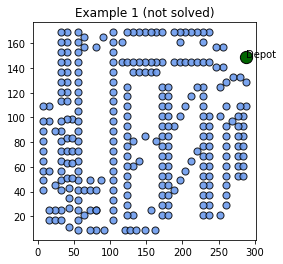

In [4]:
# Example 1 (not solved)
instance = routing.load_instance('data/examples/ex1_tsp.json')
instance.plot(title='Example 1 (not solved)')

Solution distance: 2790 (vehicles used: 1)

Route:
 0 -> 1 -> 279 -> 2 -> 278 -> 277 -> 248 -> 247 -> 243 -> 242 -> 241 -> 240 -> 239 -> 238 -> 245 -> 244 -> 246 -> 249 -> 250 -> 229 -> 228 -> 231 -> 230 -> 237 -> 236 -> 235 -> 234 -> 233 -> 232 -> 227 -> 226 -> 225 -> 224 -> 223 -> 222 -> 218 -> 221 -> 220 -> 219 -> 202 -> 203 -> 204 -> 205 -> 207 -> 206 -> 211 -> 212 -> 215 -> 216 -> 217 -> 214 -> 213 -> 210 -> 209 -> 208 -> 251 -> 254 -> 255 -> 257 -> 256 -> 253 -> 252 -> 139 -> 140 -> 141 -> 142 -> 143 -> 199 -> 201 -> 200 -> 195 -> 194 -> 193 -> 191 -> 190 -> 189 -> 188 -> 187 -> 163 -> 164 -> 165 -> 166 -> 167 -> 168 -> 169 -> 171 -> 170 -> 172 -> 105 -> 106 -> 104 -> 103 -> 107 -> 109 -> 110 -> 113 -> 114 -> 116 -> 117 -> 61 -> 62 -> 63 -> 65 -> 64 -> 84 -> 85 -> 115 -> 112 -> 86 -> 83 -> 82 -> 87 -> 111 -> 108 -> 89 -> 90 -> 91 -> 102 -> 101 -> 100 -> 99 -> 98 -> 97 -> 96 -> 95 -> 94 -> 93 -> 92 -> 79 -> 88 -> 81 -> 80 -> 78 -> 77 -> 76 -> 74 -> 75 -> 73 -> 72 -> 71 -> 70 -> 69

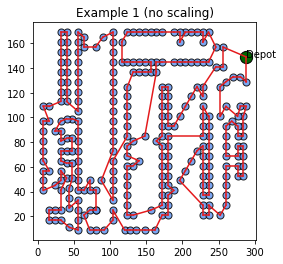

In [5]:
# Example 1 (solved without scaling and local search)
instance.solve(first_solution='PATH_CHEAPEST_ARC', time_limit=5, scaling=False, verbose=2)
instance.plot(title='Example 1 (no scaling)', solved=True)

Solution distance: 2740.27 (vehicles used: 1)



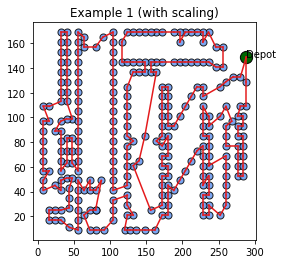

In [6]:
# Example 1 (solved with scaling but without local search)
instance.solve(first_solution='PATH_CHEAPEST_ARC', time_limit=5, scaling=True)
instance.plot(title='Example 1 (with scaling)', solved=True)

Solution distance: 2671.42 (vehicles used: 1)



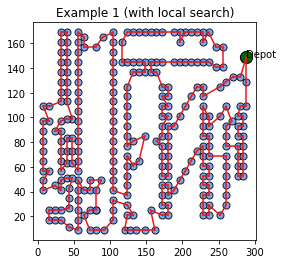

In [7]:
# Example 1 (solved with scaling and local search)
instance.solve(first_solution='PATH_CHEAPEST_ARC', local_search='GUIDED_LOCAL_SEARCH', time_limit=30)
instance.plot(title='Example 1 (with local search)', solved=True)

Solution distance: 3148.0 (vehicles used: 1)



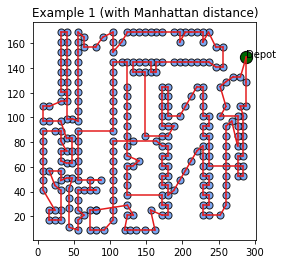

In [8]:
# Example 1 (solved with scaling but without local search, using the Manhattan distance)
instance.compute_distance_matrix(distance_metric='manhattan')
instance.solve(first_solution='PATH_CHEAPEST_ARC', time_limit=5)
instance.plot(title='Example 1 (with Manhattan distance)', solved=True)

In [9]:
# Example 2 (solved directly from a given distance matrix without locations)
instance = routing.load_instance('data/examples/ex2_tsp.pickle') # alternative loads from json or txt
instance.solve(first_solution = 'PATH_CHEAPEST_ARC', time_limit = 5, verbose = 2)
instance.plot(title='Example 2', solved=True)

Solution distance: 7293.0 (vehicles used: 1)

Route:
 0 -> 7 -> 2 -> 3 -> 4 -> 12 -> 6 -> 8 -> 1 -> 11 -> 10 -> 5 -> 9 -> 0


No locations are given for plotting.


### 4.2. CVRP examples <a name="cvrp"></a>

Solution distance: 6872.0 (vehicles used: 4)

Route for vehicle 0 (distance: 2192, load: 15):
 0 Load(0) ->  1 Load(1) ->  4 Load(5) ->  3 Load(7) ->  15 Load(15) ->  0 Load(15)

Route for vehicle 1 (distance: 2192, load: 15):
 0 Load(0) ->  14 Load(4) ->  16 Load(12) ->  10 Load(14) ->  2 Load(15) ->  0 Load(15)

Route for vehicle 2 (distance: 1324, load: 15):
 0 Load(0) ->  7 Load(8) ->  13 Load(12) ->  12 Load(14) ->  11 Load(15) ->  0 Load(15)

Route for vehicle 3 (distance: 1164, load: 15):
 0 Load(0) ->  9 Load(1) ->  8 Load(9) ->  6 Load(13) ->  5 Load(15) ->  0 Load(15)



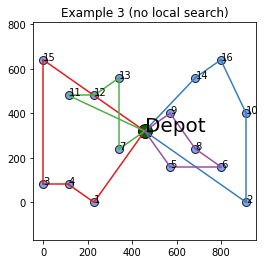

In [10]:
# Example 3 (solved without local search)
instance = routing.load_instance('data/examples/ex3_cvrp.pickle')
instance.solve(first_solution='PATH_CHEAPEST_ARC', verbose=2)
instance.plot(title='Example 3 (no local search)', solved=True, details='loc_ids', scaled=True, node_size=64, font_size=10)

Solution distance: 6208.0 (vehicles used: 4)



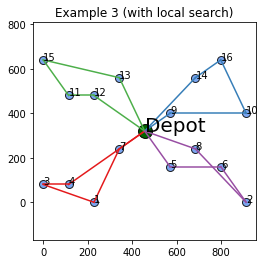

In [11]:
# Example 3 (solved with local search)
instance = routing.load_instance('data/examples/ex3_cvrp.pickle')
instance.solve(first_solution='PATH_CHEAPEST_ARC', local_search='GUIDED_LOCAL_SEARCH', time_limit=10)
instance.plot(title='Example 3 (with local search)', solved=True, details='loc_ids', scaled=True, node_size=64, font_size=10)

### 4.3. CVRPTW examples <a name="cvrptw"></a>

In [12]:
# Example 4 (try to solve)
instance = routing.load_instance('data/examples/ex4_cvrptw.pickle')
instance.solve(first_solution='PATH_CHEAPEST_ARC',local_search='GUIDED_LOCAL_SEARCH', time_limit=5, verbose=2)
instance.plot(title='Example 4', solved=True)

No solution found

No locations are given for plotting.


In [13]:
# Example 4 (try again with doubled capacities)
instance.vehicle_capacities = 2 * instance.vehicle_capacities.copy()
instance.solve(first_solution='PATH_CHEAPEST_ARC',local_search='GUIDED_LOCAL_SEARCH', time_limit=5, verbose=2)

Solution distance: 71.0 (vehicles used: 4)

Route for vehicle 0 (distance=14, load=13, time=18.0):
 0 (d0,l0,t0) -> 9 (d2,l1,t2) -> 14 (d5,l5,t7) -> 16 (d7,l13,t11) -> 0 (d14,l13,t18)

Route for vehicle 1 (distance=17, load=15, time=24.0):
 0 (d0,l0,t0) -> 7 (d2,l8,t2) -> 1 (d6,l9,t7) -> 4 (d8,l13,t10) -> 3 (d9,l15,t16) -> 0 (d17,l15,t24)

Route for vehicle 2 (distance=20, load=15, time=20.0):
 0 (d0,l0,t0) -> 12 (d4,l2,t4) -> 13 (d6,l6,t6) -> 15 (d11,l14,t11) -> 11 (d14,l15,t14) -> 0 (d20,l15,t20)

Route for vehicle 3 (distance=20, load=17, time=20.0):
 0 (d0,l0,t0) -> 5 (d3,l2,t3) -> 8 (d5,l10,t5) -> 6 (d7,l14,t7) -> 2 (d10,l15,t10) -> 10 (d14,l17,t14) -> 0 (d20,l17,t20)



### 4.4. Benchmark examples <a name="benchmark"></a>

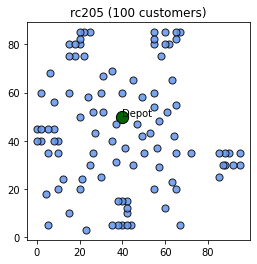

In [14]:
# Load a benchmark instance
path='data/benchmarks/solomon_instances/'
instance = routing.load_benchmark_instance('rc205', num_customers=100, path=path)
instance.plot(title='rc205 (100 customers)')

Solution distance: 1224.66 (vehicles used: 8)



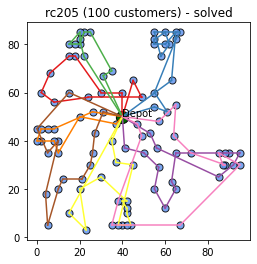

In [15]:
# Solve and plot the benchmark instance
instance.solve(first_solution='AUTOMATIC', local_search='GUIDED_LOCAL_SEARCH', time_limit=30)
instance.plot(title='rc205 (100 customers) - solved', solved=True)

Solution distance: 618.33 (vehicles used: 8)

Route for vehicle 0 (distance=83.4, load=54, time=176.23):
 0 (d0,l0,t0) -> 12 (d15,l19,t63) -> 9 (d40,l35,t98) -> 20 (d51,l44,t126) -> 1 (d68,l54,t161) -> 0 (d83,l54,t176)

Route for vehicle 1 (distance=79.01, load=51, time=170.18):
 0 (d0,l0,t0) -> 14 (d32,l20,t32) -> 15 (d47,l28,t61) -> 13 (d67,l51,t159) -> 0 (d79,l51,t170)

Route for vehicle 3 (distance=81.11, load=45, time=149.5):
 0 (d0,l0,t0) -> 11 (d33,l12,t67) -> 19 (d40,l29,t84) -> 10 (d55,l45,t124) -> 0 (d81,l45,t149)

Route for vehicle 4 (distance=77.76, load=16, time=187.41):
 0 (d0,l0,t0) -> 7 (d21,l5,t81) -> 8 (d33,l14,t103) -> 17 (d47,l16,t157) -> 0 (d77,l16,t187)

Route for vehicle 5 (distance=99.51, load=34, time=183.0):
 0 (d0,l0,t0) -> 2 (d18,l7,t50) -> 21 (d28,l18,t70) -> 3 (d55,l31,t116) -> 24 (d69,l34,t153) -> 0 (d99,l34,t183)

Route for vehicle 6 (distance=31.62, load=12, time=102.81):
 0 (d0,l0,t0) -> 18 (d15,l12,t87) -> 0 (d31,l12,t102)

Route for vehicle 7 (distan

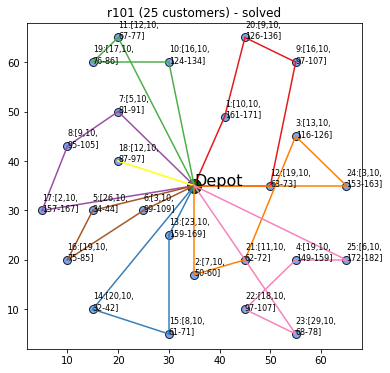

In [16]:
# Another benchmark example with plotted with more details
instance = routing.load_benchmark_instance('r101', num_customers=25)
instance.solve(first_solution='AUTOMATIC', local_search='GUIDED_LOCAL_SEARCH', time_limit=30, verbose=2)
instance.plot(title='r101 (25 customers) - solved', solved=True, details='all', fig_size=(6, 6), node_size=64, font_size=8)